mean(inside) 함수는 원 안에 있는 점들의 비율을 계산합니다. 이 비율은 원의 넓이와 정확히 일치합니다. 따라서 pi_estimate = 4 * mean(inside)는 해당 원의 넓이(A)와 전체 정사각형의 넓이(S)와의 비율, 즉 A/S = π/4와 같습니다.

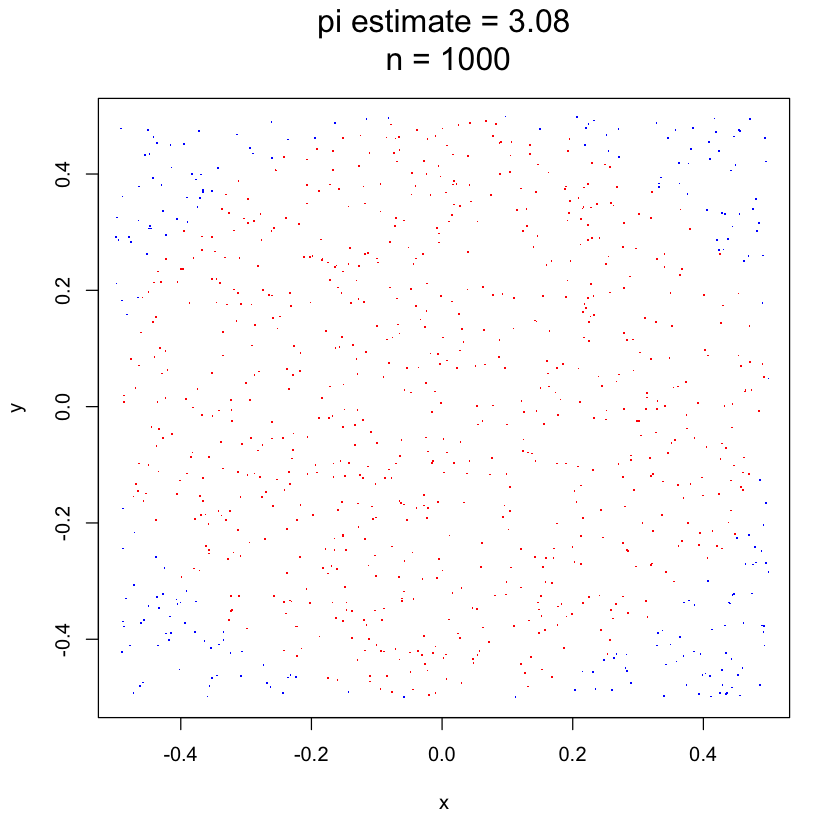

In [3]:
set.seed(1)  # 난수 초기치 설정
n <- 1000   # 난수 개수 설정
x <- runif(n, -0.5, 0.5)  # -0.5와 0.5 사이의 uniform 분포에서 난수 생성
y <- runif(n, -0.5, 0.5)
inside <- x^2 + y^2 < 0.25  # 원 안에 포함되는지 여부 계산
plot(x[inside], y[inside], col = "red", pch = ".", cex = 0.5, xlab = "x", ylab = "y", main = "")
points(x[!inside], y[!inside], col = "blue", pch = ".", cex = 0.5)
pi_estimate <- 4 * mean(inside)
mtext(paste0("pi estimate = ", pi_estimate, "\n n = ", n), side = 3, line = 1, cex = 1.6)

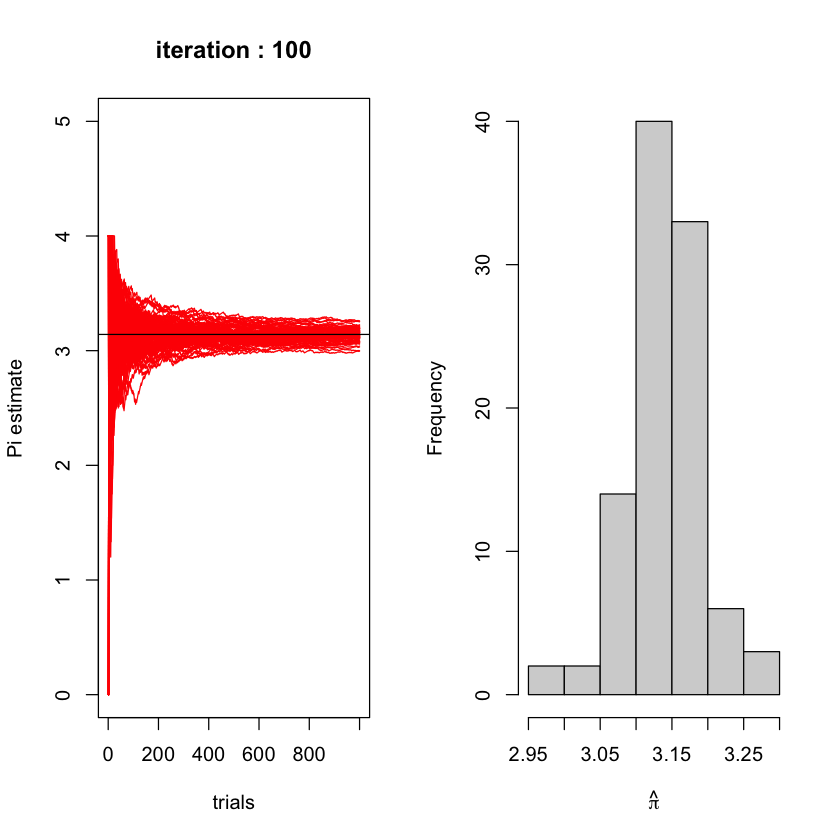

In [48]:
set.seed(1)
n <- 1000
pi_estimates <- matrix(nrow = n, ncol = 100)

for (i in 1:100) {
  x <- runif(n, -0.5, 0.5)
  y <- runif(n, -0.5, 0.5)
  inside <- x^2 + y^2 < 0.25
  pi_estimate <- 4 * cumsum(inside) / seq_along(inside)
  pi_estimates[, i] <- pi_estimate
}

par(mfrow=c(1,2))

matplot(pi_estimates, type = "l", col = "red", lty = 1, xlab = "trials", 
        ylab = "Pi estimate", ylim = c(0, 5), main = "iteration : 100")
abline(h = pi, lty = 1)
hist(pi_estimates[1000,], main = "", xlab = expression(hat(pi)))

In [50]:
min(pi_estimates[1000,])
max(pi_estimates[1000,])
mean(pi_estimates[1000,])

[1] 2.996

[1] 3.26

[1] 3.1402

---

[1] 3.116883

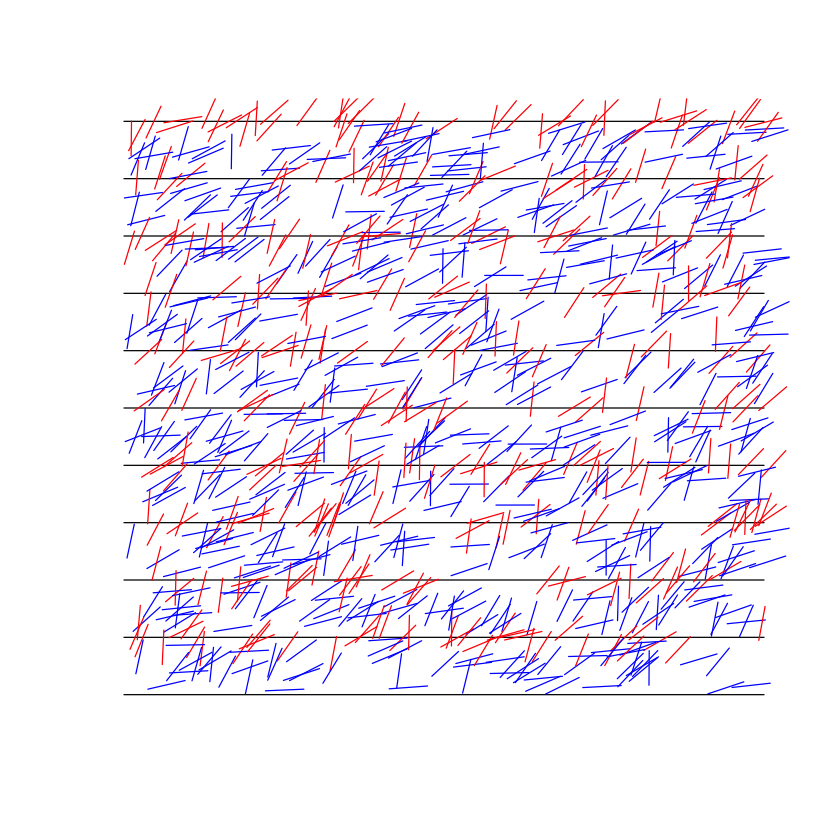

In [151]:
set.seed(1)

# 수평선 그리기
par(bg = "white", col.axis = "white", col.lab = "white", col.main = "white", 
    col.sub = "white", xaxt = "n", yaxt = "n", bty = "n")
plot(x = c(0, 10), y = c(0, 10), type = "n")
for (i in 0:10) {
  lines(x = c(0, 10), y = rep(i, 2), lty = 1)
}

# 바늘 떨어뜨리기
hits <- 0
for (i in 1:1000) {
  x1 <- runif(1, 0, 10)
  y1 <- runif(1, 0, 10)
  angle <- runif(1, 0, pi/2)
  x2 <- x1 + 0.6 * cos(angle)
  y2 <- y1 + 0.6 * sin(angle)
  
  if (floor(y1) == floor(y2) & ceiling(y1) == ceiling(y2)) {
    col <- "blue"
    } else {
      col <- "red"
      hits <- hits + 1
  }
  
  lines(x = c(x1, x2), y = c(y1, y2), col = col)
}

# pi 추정하기
pi_estimate <- 2 * 0.6 * 1000 / hits
pi_estimate


In [140]:
hits

[1] 1000

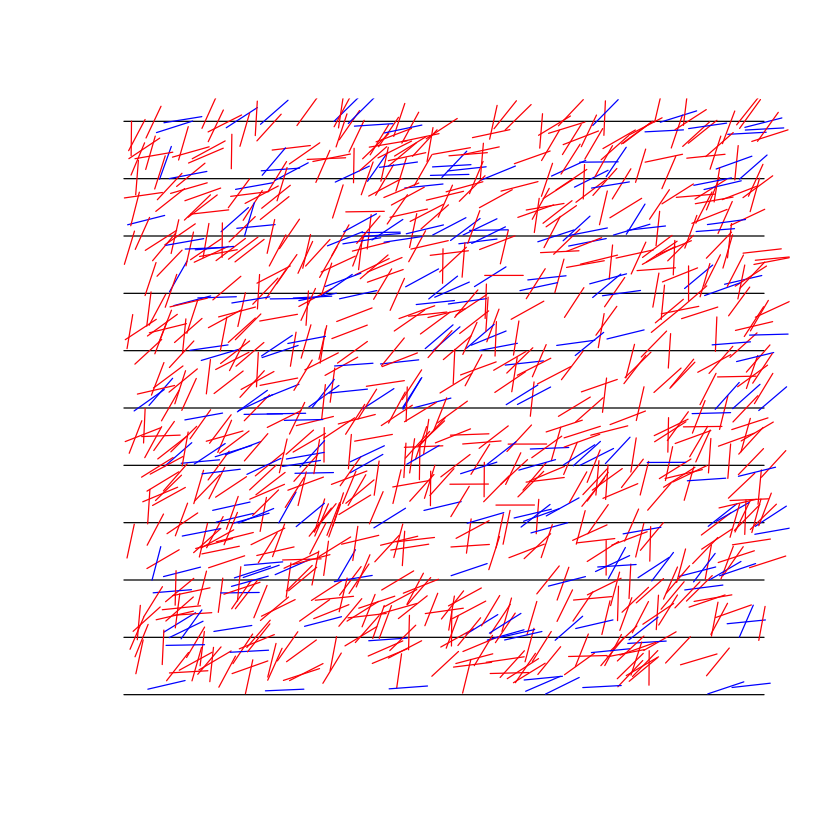

In [130]:
set.seed(1)

# 수평선 그리기
par(bg = "white", col.axis = "white", col.lab = "white", col.main = "white", 
    col.sub = "white", xaxt = "n", yaxt = "n", bty = "n")
plot(x = c(0, 10), y = c(0, 10), type = "n")
for (i in 0:10) {
  lines(x = c(0, 10), y = rep(i, 2), lty = 1)
}

# 바늘 떨어뜨리기
hits <- 0
for (i in 1:1000) {
  x <- runif(1, 0, 10)
  y <- runif(1, 0, 10)
  angle <- runif(1, 0, pi/2)
  
  if (y + 0.3 * sin(angle) > floor(y) + 0.3 & y - 0.3 * sin(angle) <= ceiling(y) - 0.3) {
    hits <- hits + 1
    col <- "red"
  } else {
    col <- "blue"
  }
  
  lines(x = c(x, x + 0.6 * cos(angle)), y = c(y, y + 0.6 * sin(angle)), col = col)
}

# pi 추정하기
